In [3]:
import requests
import xmltodict, json
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

In [1]:
key = 'xhgQoB2u7VqMuQGRKrDa6KLMfq2syfZeeAuEItSoVBfsL7hytyzbKBVbzAPD34JKyCtl3fbgQfdodniyjfueEw%3D%3D&pageNo=1&numOfRows=10&startCreateDt=20200315&endCreateDt=20210815'
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19GenAgeCaseInfJson?serviceKey={}'.format(key)

In [6]:
# 오픈API 불러오기
content = requests.get(url).content
dict1=xmltodict.parse(content)
jsonStr=json.dumps(dict1['response']['body']['items'], ensure_ascii=False)
jsonObj = json.loads(jsonStr)
jsonObj['item']
# df=pd.DataFrame(jsonObj['item'], index=['index','확진자수','확진률'])

# df.to_excel("누적확진자.xlsx")

[{'confCase': '11262',
  'confCaseRate': '5.03',
  'createDt': '2021-08-15 16:46:14.429',
  'criticalRate': '0',
  'death': '0',
  'deathRate': '0.00',
  'gubun': '0-9',
  'seq': '10893',
  'updateDt': 'null'},
 {'confCase': '18493',
  'confCaseRate': '8.26',
  'createDt': '2021-08-15 16:46:14.428',
  'criticalRate': '0',
  'death': '0',
  'deathRate': '0.00',
  'gubun': '10-19',
  'seq': '10892',
  'updateDt': '2021-08-17 10:50:58.59'},
 {'confCase': '39896',
  'confCaseRate': '17.82',
  'createDt': '2021-08-15 16:46:14.428',
  'criticalRate': '0.02',
  'death': '6',
  'deathRate': '0.28',
  'gubun': '20-29',
  'seq': '10891',
  'updateDt': '2021-08-18 14:53:52.875'},
 {'confCase': '33113',
  'confCaseRate': '14.79',
  'createDt': '2021-08-15 16:46:14.428',
  'criticalRate': '0.03',
  'death': '11',
  'deathRate': '0.51',
  'gubun': '30-39',
  'seq': '10890',
  'updateDt': 'null'},
 {'confCase': '35486',
  'confCaseRate': '15.85',
  'createDt': '2021-08-15 16:46:14.428',
  'criticalRa

In [7]:
cov=pd.read_excel("누적확진자.xlsx")

In [8]:
cov

,Unnamed: 0,confCase,confCaseRate,createDt,criticalRate,death,deathRate,gubun,seq,updateDt
0,0,11262,5.03,2021-08-15 16:46:14.429,0.00,0,0.00,0-9,10893,NaN
1,1,18494,8.26,2021-08-15 16:46:14.428,0.00,0,0.00,10-19,10892,NaN
2,2,39899,17.82,2021-08-15 16:46:14.428,0.02,6,0.28,20-29,10891,NaN
3,3,33113,14.79,2021-08-15 16:46:14.428,0.03,11,0.51,30-39,10890,NaN
4,4,35486,15.85,2021-08-15 16:46:14.428,0.05,19,0.88,40-49,10889,NaN
...,...,...,...,...,...,...,...,...,...,...
5459,5459,1257,12.60,2020-04-02 19:02:48.48,1.78,22,13.58,60-69,5,NaN
5460,5460,663,6.65,2020-04-02 19:02:48.48,7.07,46,28.40,70-79,4,NaN
5461,5461,453,4.54,2020-04-02 19:02:48.48,18.55,82,50.62,80 이상,3,NaN
5462,5462,5997,60.11,2020-04-02 19:02:48.48,1.36,80,49.38,여성,2,NaN


In [9]:
for i in range(len(cov)):
    cov.loc[i, 'createDt']=cov.loc[i, 'createDt'][:7]

In [10]:
cov_gu=list(set(cov['gubun']))
cov_gu.sort()
cov_gu
cov_Dt=list(set(cov['createDt']))
cov_Dt=sorted(cov_Dt)

In [11]:
# 각 연령층 월별 사망자, 확진자
cov_20_04 = []
for j in cov_Dt:
    cov4 = cov[cov['createDt'] == j]
    for i in cov_gu:
        cov4_0=cov4.copy()[cov4['gubun'] == i].reset_index()
        cov40=cov4_0.copy().loc[0]
        cov40['확진자'] =cov4_0.iloc[0]['confCase']-cov4_0.iloc[-1]['confCase']
        cov40['사망자'] = cov4_0.iloc[0]['death']-cov4_0.iloc[-1]['death']
        cov_20_04.append(cov40[2:])

df=pd.DataFrame(np.array(cov_20_04),columns=['confCase','confCaseRate','createDt','criticalRate','death','deathRate','gubun','seq','updateDt','월확진자','월사망자'])
df.to_excel("covid_19확진자(연령,성).xlsx")
df

,confCase,confCaseRate,createDt,criticalRate,death,deathRate,gubun,seq,updateDt,월확진자,월사망자
0,140,1.3,2020-04,0.0,0,0.0,0-9,453,NaN,21,0
1,590,5.48,2020-04,0.0,0,0.0,10-19,452,NaN,68,0
2,2952,27.42,2020-04,0.0,0,0.0,20-29,451,NaN,248,0
3,1158,10.76,2020-04,0.17,2,0.81,30-39,450,NaN,115,1
4,1427,13.26,2020-04,0.21,3,1.21,40-49,449,NaN,90,2
...,...,...,...,...,...,...,...,...,...,...,...
182,27725,12.38,2021-08,1.01,281,13.03,60-69,10887,NaN,1950,17
183,11677,5.21,2021-08,5.21,608,28.2,70-79,10886,NaN,606,15
184,6497,2.9,2021-08,17.47,1135,52.64,80 이상,10885,NaN,306,8
185,114536,51.15,2021-08,0.94,1074,49.81,남성,10883,NaN,12624,29


In [13]:
cov_gu2=cov_gu[:-2]
cov_gu2

['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80 이상']

In [12]:
# for j in cov_Dt:
#     cov4 = cov[cov['createDt'] == j]
#     for i in cov_gu:
#         cov4_0=cov4.copy()[cov4['gubun'] == i].reset_index()
#         cov40=cov4_0.copy().loc[0]
#         cov40['확진자'] =cov4_0.iloc[0]['confCase']-cov4_0.iloc[-1]['confCase']
#         cov40['사망자'] = cov4_0.iloc[0]['death']-cov4_0.iloc[-1]['death']
#         cov_20_04.append(cov40[2:])
# cov_20_04

In [14]:
df[df['createDt'] == '2020-06']

,confCase,confCaseRate,createDt,criticalRate,death,deathRate,gubun,seq,updateDt,월확진자,월사망자
22,158,1.37,2020-06,0.0,0,0.0,0-9,7911,NaN,0,0
23,659,5.73,2020-06,0.0,0,0.0,10-19,7910,NaN,0,0
24,3176,27.61,2020-06,0.0,0,0.0,20-29,7909,NaN,-7,0
25,1296,11.27,2020-06,0.15,2,0.74,30-39,7908,NaN,-3,0
26,1527,13.27,2020-06,0.2,3,1.11,40-49,7907,NaN,-2,0
27,2052,17.84,2020-06,0.73,15,5.54,50-59,7906,NaN,-9,0
28,1410,12.26,2020-06,2.77,39,14.39,60-69,7905,NaN,-11,0
29,727,6.32,2020-06,11.0,80,29.52,70-79,7904,NaN,-5,0
30,498,4.33,2020-06,26.51,132,48.71,80 이상,7903,NaN,-1,-1
31,4807,41.79,2020-06,2.97,143,52.77,남성,7901,NaN,-22,-1


In [15]:
df[df['createDt'] == '2020-04']

,confCase,confCaseRate,createDt,criticalRate,death,deathRate,gubun,seq,updateDt,월확진자,월사망자
0,140,1.3,2020-04,0.0,0,0.0,0-9,453,NaN,21,0
1,590,5.48,2020-04,0.0,0,0.0,10-19,452,NaN,68,0
2,2952,27.42,2020-04,0.0,0,0.0,20-29,451,NaN,248,0
3,1158,10.76,2020-04,0.17,2,0.81,30-39,450,NaN,115,1
4,1427,13.26,2020-04,0.21,3,1.21,40-49,449,NaN,90,2
5,1956,18.17,2020-04,0.77,15,6.07,50-59,448,NaN,78,5
6,1348,12.52,2020-04,2.6,35,14.17,60-69,447,NaN,91,13
7,709,6.59,2020-04,10.44,74,29.96,70-79,446,NaN,46,28
8,485,4.51,2020-04,24.33,118,47.77,80 이상,445,NaN,32,36
9,4352,40.43,2020-04,2.99,130,52.63,남성,443,NaN,373,48


In [16]:
# 각 구간별 월별확진자, 월별 누적확진자 
cov_5 = []
for i in cov_Dt:
    df1=df[df['createDt'] == i]
    result = 0 
    result1 = 0
    result2 = 0
    result3 = 0
    for j in range(len(cov_gu2)):
        if j == 0:
            result += int(df1[df1['gubun'] == cov_gu2[j]]['월확진자'])
        elif j == 1 :
            result1 += int(df1[df1['gubun'] == cov_gu2[j]]['월확진자'])
        elif j < 6 and j > 1 :
            result2 += int(df1[df1['gubun'] == cov_gu2[j]]['월확진자'])
        elif j > 5:
            result3 += int(df1[df1['gubun'] == cov_gu2[j]]['월확진자'])
    cov_5.append(pd.DataFrame({'년도' : i,
                 '연령층' : ['어린이', '청소년', '일반', '경로'],
                  '확진자수' :[result, result1, result2, result3]}))
    
cov_6 = []
for i in cov_Dt:
    df1=df[df['createDt'] == i]
    result = 0 
    result1 = 0
    result2 = 0
    result3 = 0
    for j in range(len(cov_gu2)):
        if j == 0:
            result += int(df1[df1['gubun'] == cov_gu2[j]]['confCase'])
        elif j == 1 :
            result1 += int(df1[df1['gubun'] == cov_gu2[j]]['confCase'])
        elif j < 6 and j > 1 :
            result2 += int(df1[df1['gubun'] == cov_gu2[j]]['confCase'])
        elif j > 5:
            result3 += int(df1[df1['gubun'] == cov_gu2[j]]['confCase'])
    cov_6.append(pd.DataFrame({'년도' : i,
                 '연령층' : ['어린이', '청소년', '일반', '경로'],
                  '누적확진자수' :[result, result1, result2, result3]}))

In [17]:
cov_51=pd.concat(cov_5).reset_index()
cov_51

,index,년도,연령층,확진자수
0,0,2020-04,어린이,21
1,1,2020-04,청소년,68
2,2,2020-04,일반,531
3,3,2020-04,경로,169
4,0,2020-05,어린이,9
...,...,...,...,...
63,3,2021-07,경로,3515
64,0,2021-08,어린이,1535
65,1,2021-08,청소년,2642
66,2,2021-08,일반,17106


In [18]:
cov_61=pd.concat(cov_6).reset_index()
cov_61

,index,년도,연령층,누적확진자수
0,0,2020-04,어린이,140
1,1,2020-04,청소년,590
2,2,2020-04,일반,7493
3,3,2020-04,경로,2542
4,0,2020-05,어린이,149
...,...,...,...,...
63,3,2021-07,경로,42872
64,0,2021-08,어린이,11262
65,1,2021-08,청소년,18494
66,2,2021-08,일반,148273


In [19]:
plt.rc('font', family='Malgun Gothic')

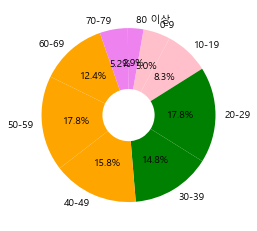

In [20]:
age=df[df['createDt'] == '2021-08'][:9]
confCase=age['confCase']
gubun=age['gubun']
wedgeprops={'width': 0.7,  'linewidth': 5}
colors = ['pink', 'pink', 'green','green','orange', 'orange', 'orange', 'violet','violet' ]
age_s=plt.pie(confCase, labels=gubun, autopct='%.1f%%', colors=colors, startangle=2600, counterclock=False, wedgeprops=wedgeprops)
plt.show(age_s)

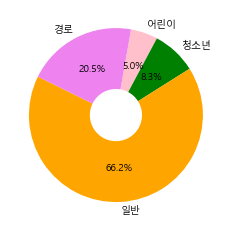

In [21]:
colors = ['pink', 'green', 'orange', 'violet' ]
age_s=plt.pie(cov_6[-1]['누적확진자수'], labels=cov_6[-1]['연령층'], autopct='%.1f%%', colors=colors, startangle=2600, counterclock=False, wedgeprops=wedgeprops)

In [22]:
# age_s=plt.pie(cov_6[-1]['누적확진자수'], labels=cov_6[-1]['연령층'], autopct='%.1f%%', colors=colors, startangle=2600, counterclock=False, wedgeprops=wedgeprops)
age_s=px.pie(cov_6[-1],values='누적확진자수', names='연령층', title='<b>연령별 확진자 수(2021.08)</b>',color_discrete_sequence = px.colors.colorbrewer.Set2)
age_s.update_traces(textinfo='percent+label', textfont_size=13, hole=.3)
age_s.show()

([<matplotlib.patches.Wedge at 0x1e6456c0bb0>,
 [Text(1.0756923938862388, -0.22996928867849442, '남성'),
  Text(-1.0756924154175127, 0.22996918796490384, '여성')],
 [Text(0.5867413057561303, -0.1254377938246333, '51.1%'),
  Text(-0.5867413175004614, 0.12543773888994755, '48.9%')])

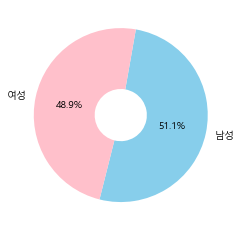

In [23]:
sex=df[df['createDt'] == '2021-08'][9:]
s_gubun=sex['gubun']
s_confCase=sex['confCase']
s_colors = ['skyblue', 'pink']
wedgeprops={'width': 0.7, 'linewidth': 5}
plt.pie(s_confCase, labels=s_gubun, autopct='%.1f%%', startangle=2600, counterclock=False, colors = s_colors, wedgeprops=wedgeprops )

In [24]:
sex_s=px.pie(sex, names = 'gubun', values = 'confCase', title = '<b>성별 확진자 수(2021.08)</b>' )
sex_s.update_traces(textinfo='percent+label', textfont_size=13, hole=.3)
sex_s.show()

In [25]:
cov_51=pd.concat(cov_5).reset_index()
cov_51

,index,년도,연령층,확진자수
0,0,2020-04,어린이,21
1,1,2020-04,청소년,68
2,2,2020-04,일반,531
3,3,2020-04,경로,169
4,0,2020-05,어린이,9
...,...,...,...,...
63,3,2021-07,경로,3515
64,0,2021-08,어린이,1535
65,1,2021-08,청소년,2642
66,2,2021-08,일반,17106


In [26]:
fig = px.bar(cov_51, x='년도', y='확진자수', 
             color = "연령층", color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_layout(title='<b>연령별 월별 신규 확진자 수</b>', 
                  plot_bgcolor="#FFFFFF",yaxis_gridcolor = '#D5D5D5')

fig.show()

In [27]:
fig = px.bar(cov_61, x='년도', y='누적확진자수', 
             color = "연령층" ,color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_layout(title='<b>연령별 누적 확진자 수 추이</b>', 
                  plot_bgcolor="#FFFFFF",yaxis_gridcolor = '#D5D5D5')

fig.show()

In [28]:
cova=cov[cov['gubun'] != '남성' ]
cova1=cova[cova['gubun'] != '여성']
cova1

,Unnamed: 0,confCase,confCaseRate,createDt,criticalRate,death,deathRate,gubun,seq,updateDt
0,0,11262,5.03,2021-08,0.00,0,0.00,0-9,10893,NaN
1,1,18494,8.26,2021-08,0.00,0,0.00,10-19,10892,NaN
2,2,39899,17.82,2021-08,0.02,6,0.28,20-29,10891,NaN
3,3,33113,14.79,2021-08,0.03,11,0.51,30-39,10890,NaN
4,4,35486,15.85,2021-08,0.05,19,0.88,40-49,10889,NaN
...,...,...,...,...,...,...,...,...,...,...
5457,5457,1337,13.40,2020-04,0.08,1,0.62,40-49,7,NaN
5458,5458,1878,18.83,2020-04,0.54,10,6.17,50-59,6,NaN
5459,5459,1257,12.60,2020-04,1.78,22,13.58,60-69,5,NaN
5460,5460,663,6.65,2020-04,7.07,46,28.40,70-79,4,NaN


In [29]:
fig = px.bar(cova1, x='createDt', y='confCase', 
             color = "gubun", color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_layout(title='<b>연령별 누적 확진자 수 추이</b>', 
                  plot_bgcolor="#FFFFFF",yaxis_gridcolor = '#D5D5D5')

fig.show()

In [30]:
covid_ifr = cova1[['createDt','gubun','criticalRate']]

covid_ifr = covid_ifr.pivot_table('criticalRate','createDt','gubun')
layout = go.Layout(
    title="<b>Covid-19 연령별 치명률</b>",    
    plot_bgcolor="#FFFFFF",
    hovermode="x",
    xaxis=dict(title="createDt", 
               linecolor="#A6A6A6",
               showspikes=True,
               spikethickness=2,
               spikedash="dot",
               spikecolor="#8C8C8C",
               spikemode="across"),
    yaxis=dict(title="criticalRate",
               gridcolor = '#D5D5D5',
               linecolor="#A6A6A6"))


covid_ifr.iplot(layout=layout, width=3, color = px.colors.colorbrewer.Spectral)